<a href="https://colab.research.google.com/github/vinigm/Estudos/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning**
---

**Tópicos**
1. Teoria;
2. Atributos categóricos;
3. Atributos numéricos;
4. Dados faltantes.

Estudaremos uma estatística *preditiva*: focando no passado para prever o futuro

**Motivação:**
Você trabalha em um time da NBA e precisa entender a relação entre o peso e altura dos jogadores da liga para ajudar o seu time a otimizar a condição física dos seus jogadores. O objetivo é responder a seguinte pergunta: Dado a **altura** de um jogador, qual deve ser o seu **peso**?

**Dados**

In [1]:
%%writefile nba.csv
height;weight;wage
2.01;86.2;17150000
1.93;106.1;898310
2.11;120.2;9881598
1.88;85.7;15643750
1.88;84.8;2875000
2.11;106.1;2376840
1.98;86.6;2625717
2.08;104.3;37199000
2.03;117.9;28942830
1.83;81.6;522738

Writing nba.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
nba_df = pd.read_csv('nba.csv', sep=';')
nba_df.head()

,height,weight,wage
0,2.01,86.2,17150000
1,1.93,106.1,898310
2,2.11,120.2,9881598
3,1.88,85.7,15643750
4,1.88,84.8,2875000


In [4]:
np.corrcoef(nba_df['weight'], nba_df['height'])

array([[1.        , 0.73782414],
       [0.73782414, 1.        ]])

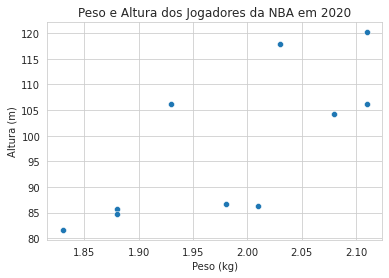

In [5]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(x=nba_df['height'], y=nba_df['weight'])
  grafico.set(title='Peso e Altura dos Jogadores da NBA em 2020', xlabel='Peso (kg)', ylabel='Altura (m)');

**Analise Preditiva**
- Dada a altura de um jogador, qual deve ser o seu peso?

Queremos uma equação matemática que represente essa relação. Uma possível equação seria a equação linear de primeiro grau:

y = f(x) = ax + b

f(altura) = a(altura) + b

**Aprendizado de Maquina**

O Aprendizado de máquina é uma area que busca modelos matemáticos preditivos utilizando dados e técnicas estatísticas computacionais.

**Preparação**
- Seleção da equação para o problema (modelo)
- Seleção dos dados disponiveis (atributos)
- Separação dos dados em treino e validação

**Treino**
- Treino do modelo com os dados de treino (algoritmo)
- Validação do modelo com os dados de validação (métricas)

**Para o exemplo da motivação:**
- **Preparação**
  - y = f(x) = ax+b
  - Peso e Altura
  - Separação dos dados em treino e validação
- **Treino**
  - Algoritmo
  - Métricas
- **Predição**

# **Atributos categóricos**
---



Apresentam valores discretos(int, float, etc), ou não (strings) para representar categorias

Vamos utilizar os dados sobre provas do vestibular, similar ao ENEM.


In [9]:
%%writefile exam.csv
ethnicity,parental_education,lunch,preparation_course,math,reading,writing,sex
group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
group C,some college,standard,completed,0.69,0.9,0.88,F
group B,master's degree,standard,none,0.9,0.95,0.93,F
group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
group C,some college,standard,none,0.76,0.78,0.75,M
group B,associate's degree,standard,none,0.71,0.83,0.78,F
group B,some college,standard,completed,0.88,0.95,0.92,F
group B,some college,free/reduced,none,0.4,0.43,0.39,M
group D,high school,free/reduced,completed,0.64,0.64,0.67,M
group B,high school,free/reduced,none,0.38,0.6,0.5,F
group C,associate's degree,standard,none,0.58,0.54,0.52,M
group D,associate's degree,standard,none,0.4,0.52,0.43,M
group B,high school,standard,none,0.65,0.81,0.73,F
group A,some college,standard,completed,0.78,0.72,0.7,M
group A,master's degree,standard,none,0.5,0.53,0.58,F
group C,some high school,standard,none,0.69,0.75,0.78,F
group C,high school,standard,none,0.88,0.89,0.86,M
group B,some high school,free/reduced,none,0.18,0.32,0.28,F
group C,master's degree,free/reduced,completed,0.46,0.42,0.46,M
group C,associate's degree,free/reduced,none,0.54,0.58,0.61,F
group D,high school,standard,none,0.66,0.69,0.63,M

Overwriting exam.csv


In [12]:
data = pd.read_csv('exam.csv')
data.head()

,ethnicity,parental_education,lunch,preparation_course,math,reading,writing,sex
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,group C,some college,standard,none,0.76,0.78,0.75,M


**Atributos Categórico Nominal**
- NÃO apresentam relação de ordem

In [13]:
data[['ethnicity', 'lunch', 'sex']].head()

,ethnicity,lunch,sex
0,group B,standard,F
1,group C,standard,F
2,group B,standard,F
3,group A,free/reduced,M
4,group C,standard,M


A técnica de codificação utilizada é a chamada **one hot encoding** em que as categorias de uma coluna são transformadas em colunas de zero e uns.

Por exemplo, com a categoria "sex":

In [14]:
data['sex_m'] = data['sex'].apply(lambda sex: 1 if sex == 'M' else 0)
data['sex_f'] = data['sex'].apply(lambda sex: 1 if sex == 'F' else 0)

data.head()

,ethnicity,parental_education,lunch,preparation_course,math,reading,writing,sex,sex_m,sex_f
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F,0,1
1,group C,some college,standard,completed,0.69,0.90,0.88,F,0,1
2,group B,master's degree,standard,none,0.90,0.95,0.93,F,0,1
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M,1,0
4,group C,some college,standard,none,0.76,0.78,0.75,M,1,0


**Atributos Categóricos Ordinais**

APRESENTAM valor de ordem.

In [15]:
data[['parental_education', 'preparation_course']].head()

,parental_education,preparation_course
0,bachelor's degree,none
1,some college,completed
2,master's degree,none
3,associate's degree,none
4,some college,none


In [17]:
data['parental_education'].drop_duplicates()

0      bachelor's degree
1           some college
2        master's degree
3     associate's degree
8            high school
15      some high school
Name: parental_education, dtype: object

In [18]:
parental_education_mapper = {
    "master's degree": 6,
    "bachelor's degree": 5,
    "associate's degree": 4,
    "some college": 3,
    "high school": 2,
    "some high school" : 1,
}

In [21]:
data['parental_education_encoded'] = data['parental_education'].apply(lambda level: parental_education_mapper[level])

In [22]:
data.head()

,ethnicity,parental_education,lunch,preparation_course,math,reading,writing,sex,sex_m,sex_f,parental_education_encoded
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F,0,1,5
1,group C,some college,standard,completed,0.69,0.90,0.88,F,0,1,3
2,group B,master's degree,standard,none,0.90,0.95,0.93,F,0,1,6
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M,1,0,4
4,group C,some college,standard,none,0.76,0.78,0.75,M,1,0,3


# **Atributos Numéricos**
---



Apresentam valores discretos ou continuos (idade, salario, altura, peso, etc...)

In [23]:
data.head()

,ethnicity,parental_education,lunch,preparation_course,math,reading,writing,sex,sex_m,sex_f,parental_education_encoded
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F,0,1,5
1,group C,some college,standard,completed,0.69,0.90,0.88,F,0,1,3
2,group B,master's degree,standard,none,0.90,0.95,0.93,F,0,1,6
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M,1,0,4
4,group C,some college,standard,none,0.76,0.78,0.75,M,1,0,3


In [24]:
data[['math','reading', 'writing']].head()

,math,reading,writing
0,0.72,0.72,0.74
1,0.69,0.90,0.88
2,0.90,0.95,0.93
3,0.47,0.57,0.44
4,0.76,0.78,0.75


**ESCALA**

Normalização - reduz a escala para o intervalo de [0,1]. Útil quando diferentes atributos possuem escalas muito diferentes, como idade e salário. Contudo a presença de **outliers** pode afetar os resultados.

Exemplo para a coluna "math":

In [26]:
min = data['math'].min()
print(min)

max = data['math'].max()
print(max)

0.18
0.9


In [27]:
data['math_norm'] = data['math'].apply(lambda grade: (grade - min) / (max-min))

In [28]:
data.head()

,ethnicity,parental_education,lunch,preparation_course,math,reading,writing,sex,sex_m,sex_f,parental_education_encoded,math_norm
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F,0,1,5,0.750000
1,group C,some college,standard,completed,0.69,0.90,0.88,F,0,1,3,0.708333
2,group B,master's degree,standard,none,0.90,0.95,0.93,F,0,1,6,1.000000
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M,1,0,4,0.402778
4,group C,some college,standard,none,0.76,0.78,0.75,M,1,0,3,0.805556


In [29]:
min = data['math_norm'].min()
print(min)

max = data['math_norm'].max()
print(max)

0.0
1.0


**PADRONIZAÇÃO**

Ao invés de reduzir pra 0 e 1, reduzimos a MEDIA para 0 e o DESVIO PADRAO para 1.

Exemplo para "math":

In [31]:
media = data['math'].mean()
print(media)

desvio_padrao = data['math'].std()
print(desvio_padrao)

0.6128571428571429
0.188019755800896


In [32]:
data['math_padr'] = data['math'].apply(lambda nota: (nota - media) / desvio_padrao)
data.head()

,ethnicity,parental_education,lunch,preparation_course,math,reading,writing,sex,sex_m,sex_f,parental_education_encoded,math_norm,math_padr
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F,0,1,5,0.750000,0.569849
1,group C,some college,standard,completed,0.69,0.90,0.88,F,0,1,3,0.708333,0.410291
2,group B,master's degree,standard,none,0.90,0.95,0.93,F,0,1,6,1.000000,1.527195
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M,1,0,4,0.402778,-0.759799
4,group C,some college,standard,none,0.76,0.78,0.75,M,1,0,3,0.805556,0.782593


In [35]:
media = data['math_padr'].mean()
print(media)

desvio_padrao = data['math_padr'].std()
print(desvio_padrao)

-1.2688263138573217e-16
1.0


# **Dados Faltantes**
---



**Técnicas**
- Atributo como variavel resposta: descartar
- Atributo categórico: descartar
- Atributo numérico: descartar ou preencher com a média/mediana

**Outros Probelmas**
- Dados redundantes: descartar
- Dados desbalanceados: pesos
- Outliers: descartar (caso não seja relevante)

# **Modelo de Regressão Linear**
---



**Tópicos**
- Regressão
- Dados
- Treino
- Avaliação
- Predição

**Motivação**
- Dada a **altura** de um jogador, qual deve ser seu **peso**?

**Equação**
- Será utilizada uma equação de função de primeiro grau

**Pacote Scikit-Learn**

- Pacote para ciencia de dados e machine learning. Para regressão linear, temos:

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()

# **Dados**
---



**Pré-processamento: 